# Oil Spill Dataset


The dataset was developed by starting with satellite images of the ocean, some of which contain an oil spill and some that do not.
Images were split into sections and processed using computer vision algorithms to provide a vector of features to describe the contents of the image section or patch.
The task is, given a vector that describes the contents of a patch of a satellite image, then predicts whether the patch contains an oil spill or not, e.g. from the illegal or accidental dumping of oil in the ocean.

There are two classes and the goal is to distinguish between spill and non-spill using the features for a given ocean patch.

Non-Spill: negative case, or majority class --> [0]

Oil Spill: positive case, or minority class --> [1]

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('oil_spill.csv')
df = df.sample(frac = 1, random_state = 7).reset_index(drop = True)
df.head(25)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,120,10,85.90,171.80,72,81000,54.10,9.18,884.0,0.17,...,484.66,90.00,54.00,49.30,8.98,1,6226.34,65.59,6.56,0
1,82,12,13.33,483.92,34,97200,73.33,5.47,868.0,0.07,...,402.49,127.28,95.46,63.64,4.22,0,5509.43,65.98,6.02,0
2,130,58,1113.98,965.40,55,145000,38.57,7.48,2310.0,0.19,...,430.12,320.16,171.41,92.94,2.51,0,3622.84,65.93,7.35,0
3,3,2339,1537.68,1633.02,45,5847500,38.13,9.29,22110.0,0.24,...,3959.80,2404.16,1530.38,659.67,2.59,0,4732.04,66.34,7.67,0
4,139,14,37.57,304.43,35,113400,55.07,7.22,1011.0,0.13,...,402.49,254.56,63.64,127.28,6.32,0,2963.85,65.75,6.28,0
5,4,220,264.28,560.03,167,1782000,45.51,13.98,11909.0,0.31,...,3623.55,655.21,357.20,157.02,10.14,1,10769.64,66.17,6.74,0
6,192,162,1178.77,993.60,99,405000,34.73,6.88,4340.0,0.20,...,1265.90,509.90,227.86,140.98,5.56,0,5606.99,65.95,7.42,0
7,61,61,1245.49,1268.11,151,85781,33.87,14.88,1302.0,0.44,...,469.87,251.56,129.70,75.38,3.62,0,7610.61,36.85,15.16,0
8,98,92,1401.25,933.60,93,230000,43.38,5.99,3430.0,0.14,...,951.31,300.00,176.32,88.77,5.40,0,8586.62,65.98,7.75,0
9,15,33,30.55,385.03,51,267300,72.61,16.89,1482.0,0.23,...,576.28,381.84,305.47,69.71,1.89,0,9412.12,65.85,6.18,0


## --> Exploración

In [15]:
df.shape

(937, 50)

In [16]:
df['target'].value_counts()

target
0    896
1     41
Name: count, dtype: int64

In [17]:
clase_mayoritaria = df['target'].value_counts()[0]
clase_minoritaria = df['target'].value_counts()[1]
IR = clase_mayoritaria / clase_minoritaria
print(f"IR: {IR}")
# Es un conjunto de datos desbalanceado

IR: 21.853658536585368


## Limpieza de repetidos e indiscernibles  


In [18]:
# ELiminar datos nulos
df = df.dropna()

# Eliminar duplicados
df = df.drop_duplicates(keep = 'first')

# Eliminar indiscernibles
caracteristicas = df.drop('target', axis = 1)
df = df[~df.duplicated(subset = caracteristicas, keep = False)]

df.shape
# No tiene valores nulos, duplicados ni indiscernibles

(937, 50)

## Creación de conjuntos de entrenamiento y prueba

In [19]:
X = df.drop('target', axis = 1)
Y = df['target']

# Entrenamiento
proporcion = 0.8

x_train = X.iloc[:int(len(X) * proporcion), :] # --> Hasta el 0.8
y_train = Y.iloc[:int(len(X) * proporcion)]

# Prueba
x_test = X.iloc[int(len(Y) * proporcion):, :] # --> Desde el 0.8
y_test = Y.iloc[int(len(Y) * proporcion):]

In [20]:
print(f"Y entrenamiento: {y_train.value_counts()}")
print(f"Y prueba       : {y_test.value_counts()}")

Y entrenamiento: target
0    718
1     31
Name: count, dtype: int64
Y prueba       : target
0    178
1     10
Name: count, dtype: int64


In [21]:
print(f"X entrenamiento: {x_train.shape}")
print(f"Y entrenamiento: {y_train.shape}")
print(f"X prueba: {x_test.shape}")
print(f"Y prueba: {y_test.shape}")

X entrenamiento: (749, 49)
Y entrenamiento: (749,)
X prueba: (188, 49)
Y prueba: (188,)


In [22]:
Y.value_counts()

target
0    896
1     41
Name: count, dtype: int64

### Aplicar SMOTE en el conjunto de entrenamiento


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 7)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [24]:
print(f"Y entrenamiento: {y_train.value_counts()}")
print(f"Y prueba       : {y_test.value_counts()}")

Y entrenamiento: target
0    718
1    718
Name: count, dtype: int64
Y prueba       : target
0    178
1     10
Name: count, dtype: int64


In [25]:
print(f"X entrenamiento: {x_train.shape}")
print(f"Y entrenamiento: {y_train.shape}")
print(f"X prueba: {x_test.shape}")
print(f"Y prueba: {y_test.shape}")

X entrenamiento: (1436, 49)
Y entrenamiento: (1436,)
X prueba: (188, 49)
Y prueba: (188,)


# Algoritmos Biclase
* Euclidiano
* 1NN
* 3NN
* 5NN
* 7NN
* IB1
* IB3
* IB5
* IB7
* Naive Bayes
* Regresión logística
* SVM
* Árbol de desición
* Random Forest
* Red Neuronal

Todos los algoritmos parten de una partición fija 80-20 con seed = 7

In [26]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    matthews_corrcoef, balanced_accuracy_score, roc_auc_score,
    confusion_matrix
)

from sklearn.metrics import confusion_matrix

In [27]:
from tabulate import tabulate
def calcula_medidas(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label = 0)
    bacc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    metrics_table = [
        ['Accuracy', accuracy],
        ['Error Rate', error_rate],
        ['Recall (Sensibilidad)', recall],
        ['Specificity', specificity],
        ['Balanced Accuracy', bacc],
        ['Precision', precision],
        ['F1 Score', f1],
        ['MCC', mcc],
        ['ROC AUC', roc]
    ]
    print(tabulate(metrics_table, headers = ['Métrica', 'Valor'], floatfmt = ".4f", tablefmt = "plain"))

In [28]:
def matriz(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  print("-"*30)
  print("Matriz de confusión:")
  print(f"{tp:>3} {fn:>3}")
  print(f"{fp:>3} {tn:>3}")

### Algoritmo Euclidiano


In [29]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8245
Error Rate              0.1755
Recall (Sensibilidad)   0.5000
Specificity             0.8427
Balanced Accuracy       0.6713
Precision               0.1515
F1 Score                0.2326
MCC                     0.2022
ROC AUC                 0.6713
------------------------------
Matriz de confusión:
  5   5
 28 150


### Euclidiano 2

In [ ]:
import numpy as np

def euclidean_predictor(x_train, y_train, x_test):
    # Asegurarse de que solo haya 2 clases
    unique_classes = np.unique(y_train)
    if len(unique_classes) != 2:
        raise ValueError("Este clasificador solo funciona para dos clases.")

    class_0, class_1 = unique_classes[0], unique_classes[1]

    # Calcular centroides
    centroid_0 = x_train[y_train == class_0].mean().values
    centroid_1 = x_train[y_train == class_1].mean().values  

    # Calcular distancias y clasificar
    y_pred = []
    for _, row in x_test.iterrows():
        dist_0 = np.linalg.norm(row.values - centroid_0)
        dist_1 = np.linalg.norm(row.values - centroid_1)
        predicted = class_0 if dist_0 < dist_1 else class_1
        y_pred.append(predicted)

    return np.array(y_pred)


euclidean_predictor(x_train, y_train, x_test)
calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8245
Error Rate              0.1755
Recall (Sensibilidad)   0.5000
Specificity             0.8427
Balanced Accuracy       0.6713
Precision               0.1515
F1 Score                0.2326
MCC                     0.2022
ROC AUC                 0.6713
------------------------------
Matriz de confusión:
  5   5
 28 150


### Algoritmo 1NN


In [23]:
KNN = KNeighborsClassifier(n_neighbors = 1, metric = 'chebyshev')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8298
Error Rate              0.1702
Recall (Sensibilidad)   0.5000
Specificity             0.8483
Balanced Accuracy       0.6742
Precision               0.1562
F1 Score                0.2381
MCC                     0.2080
ROC AUC                 0.6742
------------------------------
Matriz de confusión:
  5   5
 27 151


### Algoritmo 3NN

In [24]:
KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'chebyshev')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8298
Error Rate              0.1702
Recall (Sensibilidad)   0.8000
Specificity             0.8315
Balanced Accuracy       0.8157
Precision               0.2105
F1 Score                0.3333
MCC                     0.3529
ROC AUC                 0.8157
------------------------------
Matriz de confusión:
  8   2
 30 148


### Algoritmo 5NN

In [25]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'chebyshev')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8191
Error Rate              0.1809
Recall (Sensibilidad)   0.6000
Specificity             0.8315
Balanced Accuracy       0.7157
Precision               0.1667
F1 Score                0.2609
MCC                     0.2461
ROC AUC                 0.7157
------------------------------
Matriz de confusión:
  6   4
 30 148


### Algoritmo 7NN

In [26]:
KNN = KNeighborsClassifier(n_neighbors = 7, metric = 'chebyshev')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8245
Error Rate              0.1755
Recall (Sensibilidad)   0.7000
Specificity             0.8315
Balanced Accuracy       0.7657
Precision               0.1892
F1 Score                0.2979
MCC                     0.3000
ROC AUC                 0.7657
------------------------------
Matriz de confusión:
  7   3
 30 148


### Algoritmo IB1


In [27]:
KNN = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8617
Error Rate              0.1383
Recall (Sensibilidad)   0.5000
Specificity             0.8820
Balanced Accuracy       0.6910
Precision               0.1923
F1 Score                0.2778
MCC                     0.2483
ROC AUC                 0.6910
------------------------------
Matriz de confusión:
  5   5
 21 157


### Algoritmo IB3

In [28]:
KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8670
Error Rate              0.1330
Recall (Sensibilidad)   0.8000
Specificity             0.8708
Balanced Accuracy       0.8354
Precision               0.2581
F1 Score                0.3902
MCC                     0.4057
ROC AUC                 0.8354
------------------------------
Matriz de confusión:
  8   2
 23 155


### Algoritmo IB5


In [29]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8564
Error Rate              0.1436
Recall (Sensibilidad)   0.7000
Specificity             0.8652
Balanced Accuracy       0.7826
Precision               0.2258
F1 Score                0.3415
MCC                     0.3418
ROC AUC                 0.7826
------------------------------
Matriz de confusión:
  7   3
 24 154


### Algoritmo IB7


In [30]:
KNN = KNeighborsClassifier(n_neighbors = 7, metric = 'manhattan')
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8457
Error Rate              0.1543
Recall (Sensibilidad)   0.7000
Specificity             0.8539
Balanced Accuracy       0.7770
Precision               0.2121
F1 Score                0.3256
MCC                     0.3268
ROC AUC                 0.7770
------------------------------
Matriz de confusión:
  7   3
 26 152


### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.2819
Error Rate              0.7181
Recall (Sensibilidad)   0.7000
Specificity             0.2584
Balanced Accuracy       0.4792
Precision               0.0504
F1 Score                0.0940
MCC                    -0.0213
ROC AUC                 0.4792
------------------------------
Matriz de confusión:
  7   3
132  46


### Regresión Logística

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred )

Métrica                  Valor
Accuracy                0.9043
Error Rate              0.0957
Recall (Sensibilidad)   0.7000
Specificity             0.9157
Balanced Accuracy       0.8079
Precision               0.3182
F1 Score                0.4375
MCC                     0.4299
ROC AUC                 0.8079
------------------------------
Matriz de confusión:
  7   3
 15 163


/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [33]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.8670
Error Rate              0.1330
Recall (Sensibilidad)   0.4000
Specificity             0.8933
Balanced Accuracy       0.6466
Precision               0.1739
F1 Score                0.2424
MCC                     0.2008
ROC AUC                 0.6466
------------------------------
Matriz de confusión:
  4   6
 19 159


### Árbol de desición

In [51]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(
    criterion='entropy',        
    max_depth=8,
    min_samples_split=60,
    min_samples_leaf=10,
    random_state=7
)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.9309
Error Rate              0.0691
Recall (Sensibilidad)   0.6000
Specificity             0.9494
Balanced Accuracy       0.7747
Precision               0.4000
F1 Score                0.4800
MCC                     0.4551
ROC AUC                 0.7747
------------------------------
Matriz de confusión:
  6   4
  9 169


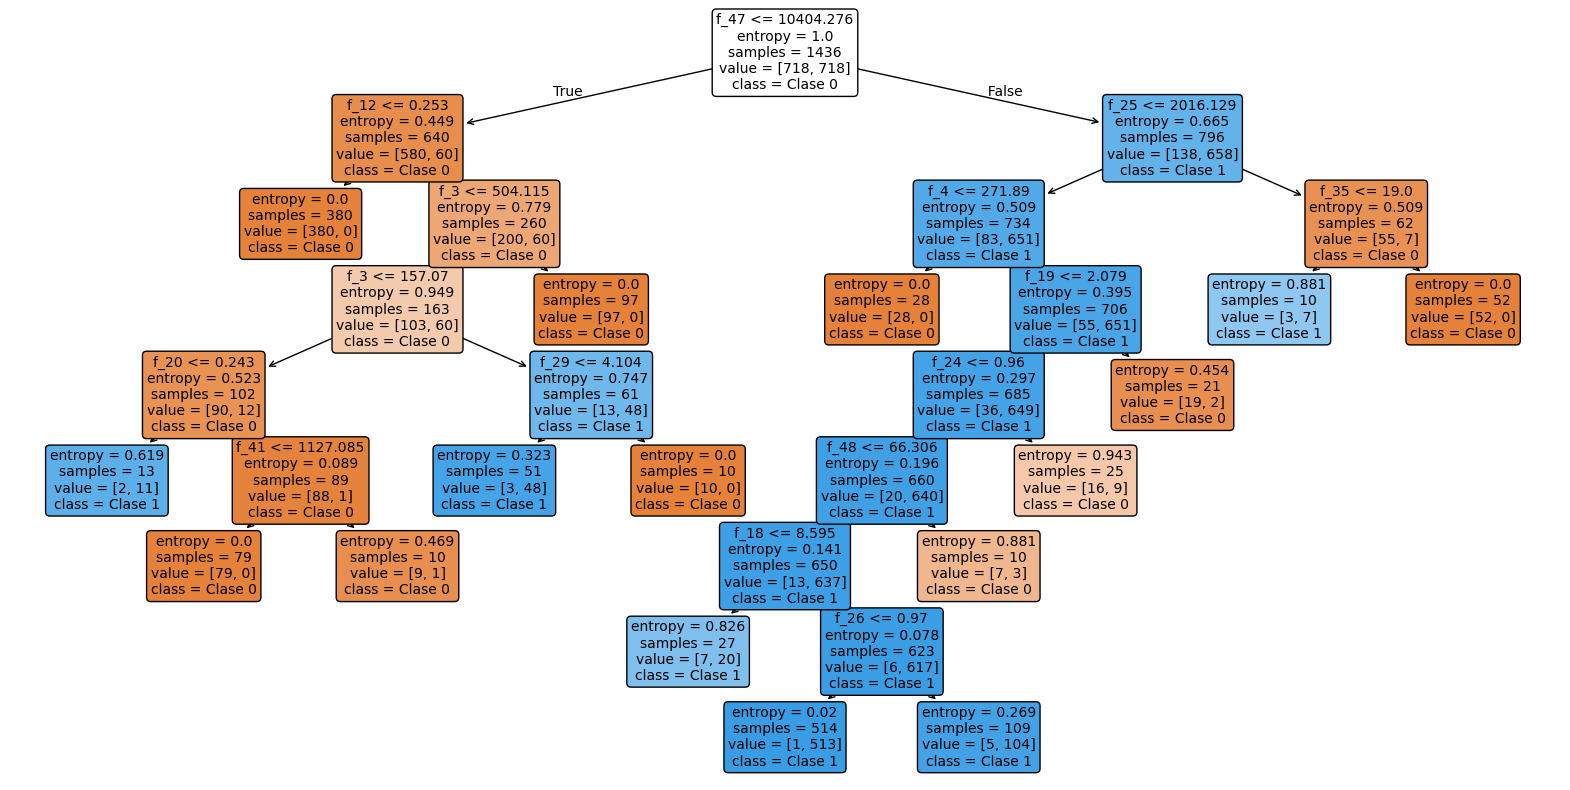

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Tamaño del gráfico
plot_tree(
    DT,
    feature_names=x_train.columns,  # si usas pandas DataFrame
    class_names=['Clase 0', 'Clase 1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

Métrica                  Valor
Accuracy                0.9574
Error Rate              0.0426
Recall (Sensibilidad)   0.6000
Specificity             0.9775
Balanced Accuracy       0.7888
Precision               0.6000
F1 Score                0.6000
MCC                     0.5775
ROC AUC                 0.7888
------------------------------
Matriz de confusión:
  6   4
  4 174


In [76]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(
    n_estimators=100,          # Número de árboles en el bosque
    criterion='entropy',       # Criterio de calidad de división ('gini' o 'entropy')
    max_depth=4,              # Profundidad máxima de cada árbol
    min_samples_split=20,      # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=40,        # Mínimo número de muestras en una hoja
    bootstrap=True,            # Habilita el muestreo con reemplazo (bagging)
    random_state=7             # Semilla para reproducibilidad
)

RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)


Métrica                  Valor
Accuracy                0.9521
Error Rate              0.0479
Recall (Sensibilidad)   0.7000
Specificity             0.9663
Balanced Accuracy       0.8331
Precision               0.5385
F1 Score                0.6087
MCC                     0.5894
ROC AUC                 0.8331
------------------------------
Matriz de confusión:
  7   3
  6 172


### Red Neuronal

In [78]:
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
import numpy as np

# Establecer semilla
SEED = 7
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

model = Sequential([
    Dense(23, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer=HeNormal(seed=SEED)),
    Dense(33, activation='relu', kernel_initializer=HeNormal(seed=SEED)),
    Dense(1, activation='sigmoid')  # Salida binaria
])

model.compile(optimizer=Adam(learning_rate=0.003), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=16,  
    validation_split=0.2,
    verbose=0
)

y_prob = model.predict(x_test).ravel()
y_pred = (y_prob >= 0.30).astype(int)

calcula_medidas(y_test, y_pred)
matriz(y_test, y_pred)

2025-06-15 21:44:57.293629: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-15 21:44:57.294483: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 21:44:57.298532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 21:44:57.309492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750045497.329402    4962 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750045497.33

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Métrica                  Valor
Accuracy                0.9521
Error Rate              0.0479
Recall (Sensibilidad)   0.7000
Specificity             0.9663
Balanced Accuracy       0.8331
Precision               0.5385
F1 Score                0.6087
MCC                     0.5894
ROC AUC                 0.8331
------------------------------
Matriz de confusión:
  7   3
  6 172
